In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt

from utils.Dataset import Dataset
from utils.classification import classification
from utils.segmentation import segmentation
from utils import config

from torch.utils.data import DataLoader
from torch import cuda


In [2]:
# check if cuda available
if not cuda.is_available():
    config.USE_CUDA = False


# LOAD Models

In [3]:
## Classification
classification = classification(
                        model_path=config.CLASSIFICATION_MODEL,
                        classes=config.CLASSES,
                        use_cuda=config.USE_CUDA,
                        )

## Segmentation
segmentation = segmentation(
                        model_path=config.SEGMENTATION_MODEL,
                        use_cuda=config.USE_CUDA,
                        )


# RIce-Net Framework

In [4]:

station = config.STATIONS

test_dataset = Dataset(
                images_path=config.DATA_PATH, 
                frame_size=(config.INPUT_IMAGE_WIDTH, config.INPUT_IMAGE_HEIGHT),
                mean=np.array(config.MEAN),
                std=np.array(config.STD),
                polygon=[np.array(config.POLYGON)],#polygons[polygons['name']==station]['polygon'].values,
                crop=config.CROP,
                )

test_dataloader = DataLoader(test_dataset, batch_size=config.TEST_BATCH_SIZE)



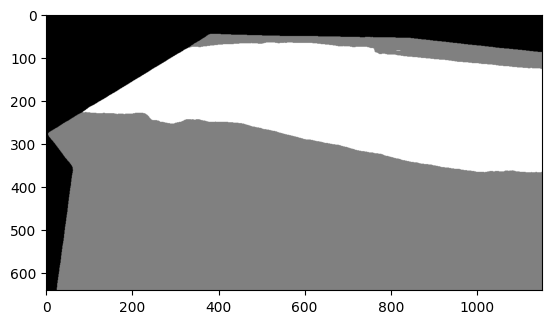

66.5546062679008


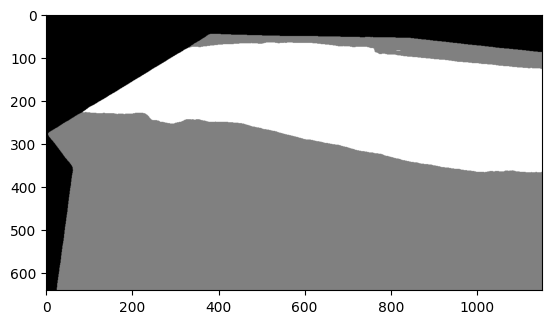

66.5546062679008
--- 3.2027881145477295 seconds ---


In [5]:
start_time = time.time()

for idx, image in enumerate(test_dataloader):

    # classify
    preds_batch, pr_label, probs_batch = classification.classify(image)

    # segment
    if preds_batch == 1:
        mask = segmentation.segment(image)

        ice_coverage = sum(mask[mask==1]) / config.PIXELS*100

        if config.SHOW:
            plt.imshow(mask.astype('uint8'), cmap="gray")
            plt.show()
    else:
        ice_coverage = 0
    print(ice_coverage)
    # break

print("--- %s seconds ---" % (time.time() - start_time))
